<a href="https://colab.research.google.com/github/Suryanarayana94/Sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 0 : Read in data and NLTK Basics



In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

plt.style.use('ggplot')

import nltk

In [136]:
import csv

with open("/content/Reviews.csv") as file:
    reader = csv.reader(file)
    rows = [row for row in reader if len(row) == 10]

df = pd.DataFrame(rows[1:], columns=rows[0])

In [137]:
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [138]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Quick EDA


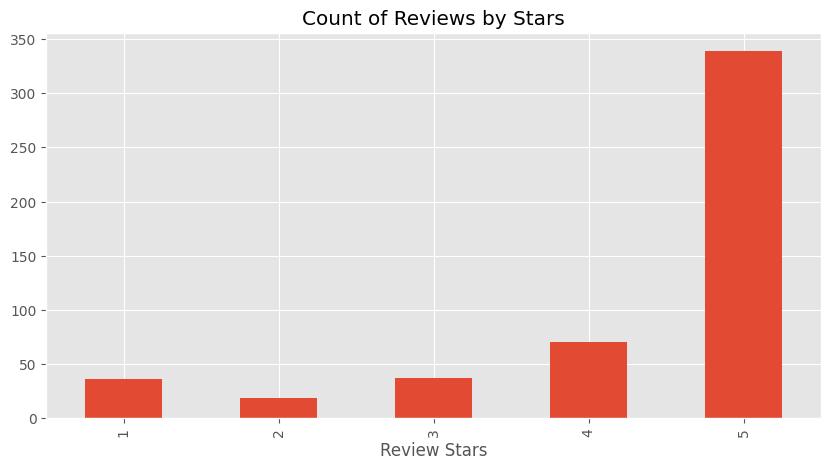

In [139]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

Basic NLTK

In [140]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [141]:
# Download the 'punkt' tokenizer models
nltk.download('punkt')

# Example text to tokenize
example = "This is a sample sentence to be tokenized."

# Tokenize the example text
tokens = nltk.word_tokenize(example)

# Display the first 10 tokens
print(tokens[:10])

['This', 'is', 'a', 'sample', 'sentence', 'to', 'be', 'tokenized', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [142]:
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Now you can use word_tokenize
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['This', 'is', 'a', 'sample', 'sentence', 'to', 'be', 'tokenized', '.']

In [143]:
import nltk

# Download the 'averaged_perceptron_tagger' resource if you haven't already
nltk.download('averaged_perceptron_tagger')

# Download the resource specific to english
nltk.download('averaged_perceptron_tagger_eng')

# Assuming 'tokens' is already defined
tagged = nltk.pos_tag(tokens)

# Display the first 10 tagged tokens
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('sample', 'JJ'),
 ('sentence', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('tokenized', 'VBN'),
 ('.', '.')]

In [144]:
# Download the maxent_ne_chunker resource
nltk.download('maxent_ne_chunker')

# Also, download the associated words corpus
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [145]:
import nltk

# Download the 'maxent_ne_chunker_tab' resource
nltk.download('maxent_ne_chunker_tab')

# Sample tagged sentence
tagged = [('Stanford', 'NNP'), ('University', 'NNP'), ('is', 'VBZ'), ('located', 'VBN'), ('in', 'IN'), ('California', 'NNP')]

# Now you can use ne_chunk
entities = nltk.chunk.ne_chunk(tagged)

# Print the named entities
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


(S
  (PERSON Stanford/NNP)
  (ORGANIZATION University/NNP)
  is/VBZ
  located/VBN
  in/IN
  (GPE California/NNP))


In [146]:
# Sample tagged sentence
tagged = [('Stanford', 'NNP'), ('University', 'NNP'), ('is', 'VBZ'), ('located', 'VBN'), ('in', 'IN'), ('California', 'NNP')]

# Download necessary NLTK resources
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Perform named entity recognition
entities = nltk.chunk.ne_chunk(tagged)

# Print the named entities
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  (PERSON Stanford/NNP)
  (ORGANIZATION University/NNP)
  is/VBZ
  located/VBN
  in/IN
  (GPE California/NNP))


Step 1. VADER Sentiment Scoring

In [147]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [148]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [149]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [150]:
sia.polarity_scores('This is the worst')

{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'compound': -0.6249}

In [151]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.0772}

In [152]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [153]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [154]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Plot VADER results

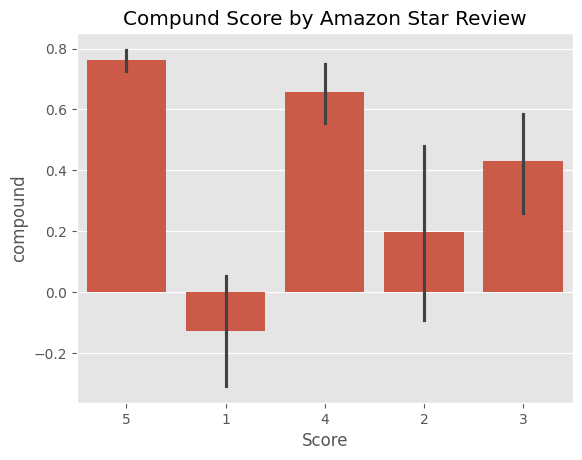

In [155]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

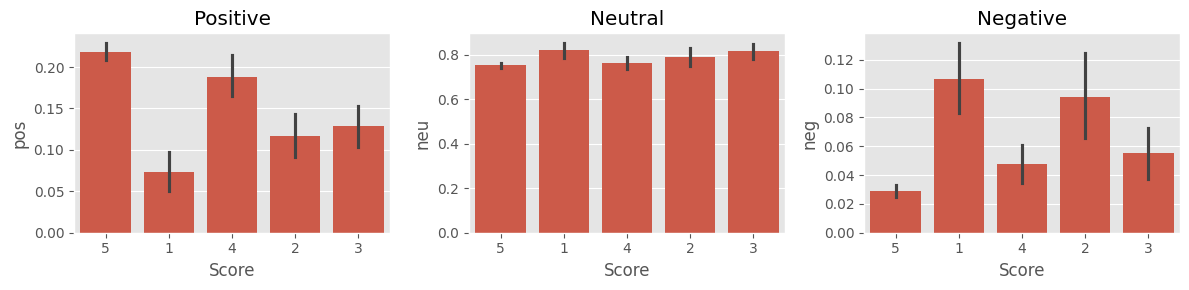

In [156]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Step 3. Roberta pretrained Model

In [157]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [158]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [159]:
print(example)
sia.polarity_scores(example)

This is a sample sentence to be tokenized.


{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.0772}

In [160]:
 #Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.05630401, 'roberta_neu': 0.8752237, 'roberta_pos': 0.06847216}


In [161]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how="left")

Compare Scores between models

In [ ]:
results_df.columns

Step 3. Combine and compare

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

Step 4. Review Examples:

In [ ]:
# Query the DataFrame for rows where Score == 1
filtered_df = results_df.query('Score == 1')

# Check if the filtered DataFrame is not empty
if not filtered_df.empty:
    # Sort the filtered DataFrame by 'roberta_pos' in descending order
    sorted_df = filtered_df.sort_values('roberta_pos', ascending=False)
    # Access the first value in the 'Text' column
    first_text_value = sorted_df['Text'].values[0]
else:
    first_text_value = None  # or handle it in another way

first_text_value

In [ ]:
filtered_df = results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)

# Check if the filtered DataFrame is empty
if not filtered_df.empty:
    result_text = filtered_df['Text'].values[0]
else:
    result_text = None  # or any other appropriate default value or action

result_text

In [ ]:
# Check if there are any rows that satisfy the condition
if not results_df.query('Score == 1').empty:
    # Sort the DataFrame by 'roberta_pos' column in descending order and get the first value of 'Text' column
    text_value = results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]
    print(text_value)
else:
    print("No rows with Score equal to 1 found in the DataFrame.")

Extra: The transformers pipeline

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('I love sentiment analysis!')

In [ ]:
sent_pipeline('Make sure to like and subscribe!')

In [ ]:
sent_pipeline(' bad')

In [ ]:
sent_pipeline('')

In [ ]:
sent_pipeline(' bad')